In [20]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt
import pandas as pd
import seaborn as sns

In [21]:
APAP_COX_traj1=pt.iterload('APAP_COX_0-300ns_strip.nc','APAP_COX_strip.parm7')
APAP_COX_traj2=pt.iterload('APAP_COX_rep2_0-300ns_strip.nc','APAP_COX_strip.parm7') 
APAP_COX_traj3=pt.iterload('APAP_COX_OH_strip.nc','APAP_COX_strip.parm7')
MAA_COX_traj1=pt.iterload('MAA_0-300ns_strip.nc','MAA_strip.parm7')
MAA_COX_traj2=pt.iterload('MAA_COX_rep2_0-300ns_strip.nc','MAA_strip.parm7')
AA_COX_traj1=pt.iterload('4-AA_COX_0-300ns_strip.nc','4-AA_COX_strip.parm7')
AA_COX_traj2=pt.iterload('4-AA_COX_rep2_0-300ns_strip.nc','4-AA_COX_strip.parm7')
AM404_COX_traj1=pt.iterload('AM404_COX_0-300ns_strip.nc','AM404_COX_strip.parm7')
AM404_COX_traj2=pt.iterload('AM404_COX_P_0-300ns_strip.nc','AM404_COX_P_strip.parm7')
AM404_COX_traj1

pytraj.TrajectoryIterator, 6000 frames: 
Size: 2.396286 (GB)
<Topology: 17868 atoms, 1107 residues, 3 mols, PBC with box type = orthorhombic>
           

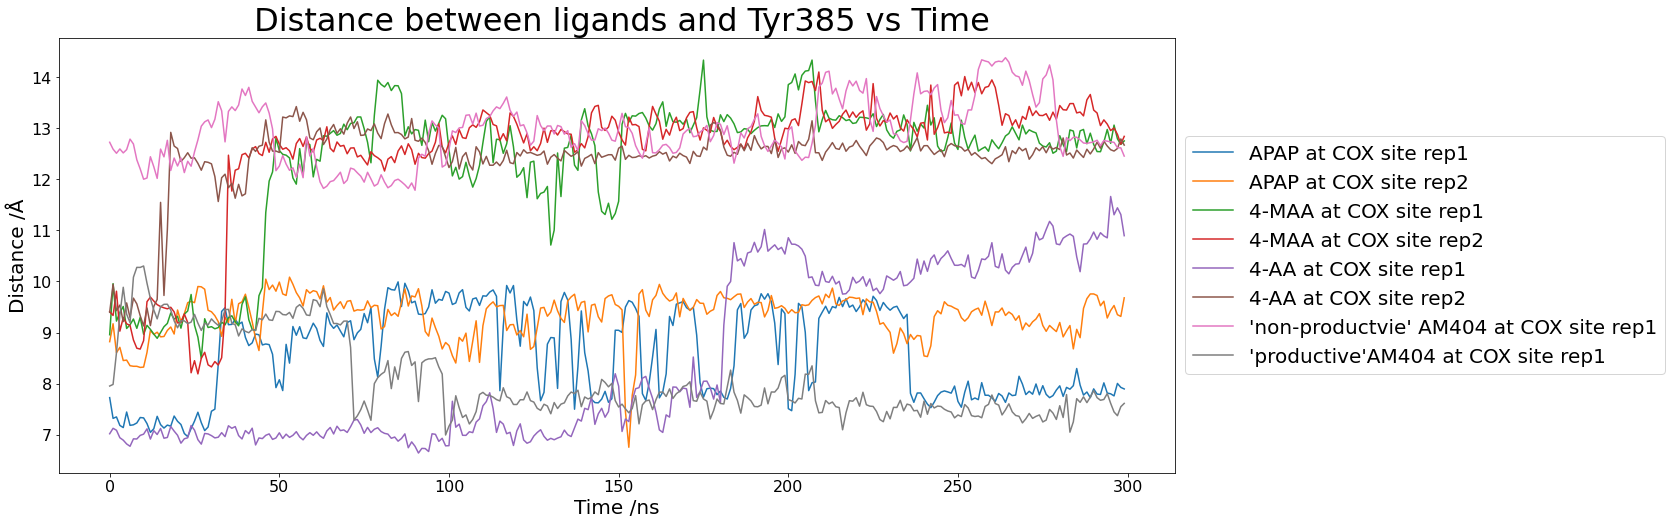

In [16]:
dist1 = pt.distance(APAP_COX_traj1, ':1 :907')
plt.figure(figsize = (20,8))
plt.plot(np.mean(dist1.reshape(300,20), axis=1),label="APAP at COX site rep1")
dist2 = pt.distance(APAP_COX_traj2, ':1 :907')
md_time= list(np.arange(0,300,0.6))
plt.plot(np.mean(dist2.reshape(300,20), axis=1),label="APAP at COX site rep2")
dist3 = pt.distance(MAA_COX_traj1, ':1 :353')
plt.plot(np.mean(dist3.reshape(300,20), axis=1),label="4-MAA at COX site rep1")
dist4 = pt.distance(MAA_COX_traj2, ':1 :353')
plt.plot(np.mean(dist4.reshape(300,20), axis=1),label="4-MAA at COX site rep2")
dist5 = pt.distance(AA_COX_traj1, ':1 :353')
plt.plot(np.mean(dist5.reshape(300,20), axis=1),label="4-AA at COX site rep1")
dist6 = pt.distance(AA_COX_traj2, ':1 :353')
plt.plot(np.mean(dist6.reshape(300,20), axis=1),label="4-AA at COX site rep2")
dist7 = pt.distance(AM404_COX_traj1, ':1 :353')
plt.plot(np.mean(dist7.reshape(300,20), axis=1),label="'non-productvie' AM404 at COX site rep1")
dist8 = pt.distance(AM404_COX_traj2, ':1 :907')
plt.plot(np.mean(dist8.reshape(300,20), axis=1),label="'productive'AM404 at COX site rep1")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Time /ns',fontsize=20)
plt.ylabel('Distance /Å',fontsize=20)
plt.title(' Distance between ligands and Tyr385 vs Time',fontsize=32)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("dist_APAP_DIP.png",dpi=400,bbox_inches='tight')

(array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

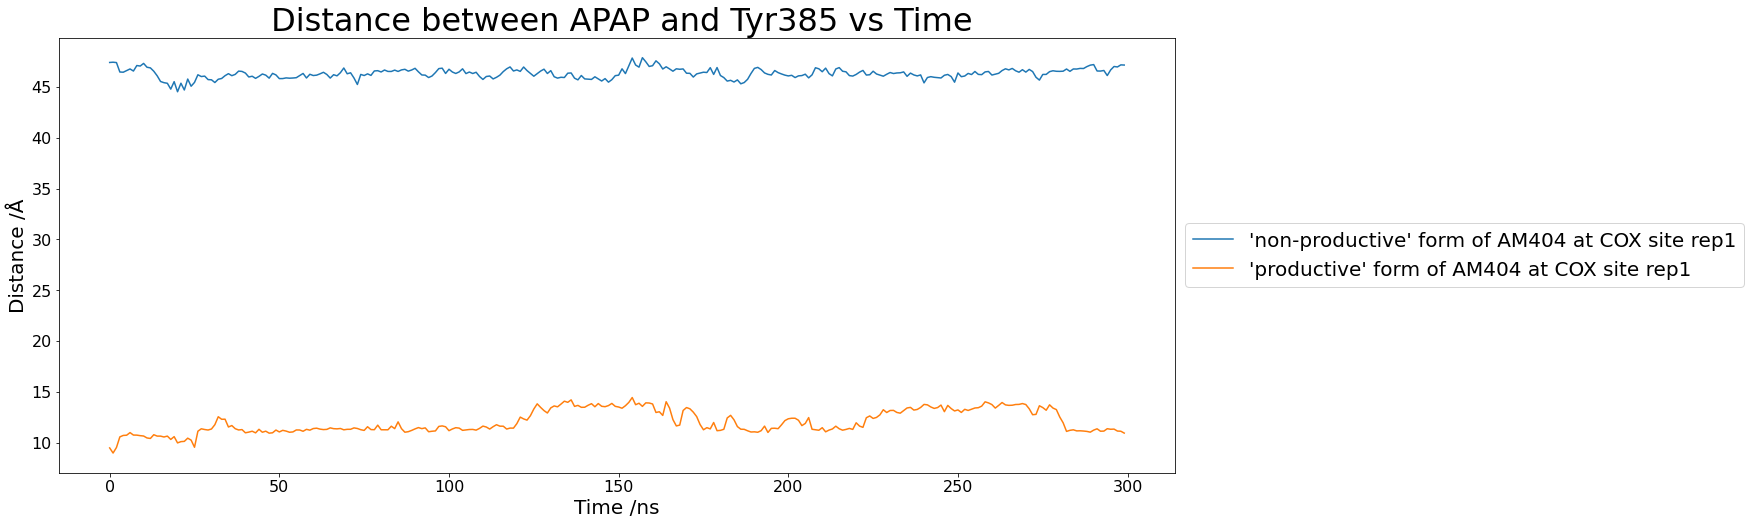

In [15]:
plt.figure(figsize = (20,8))
dist7 = pt.distance(APAP_COX_traj3, ':1 :353')
plt.plot(np.mean(dist7.reshape(300,20), axis=1),label="'non-productive' form of AM404 at COX site rep1")
dist8 = pt.distance(APAP_COX_traj3, ':1 :907')
plt.plot(np.mean(dist8.reshape(300,20), axis=1),label="'productive' form of AM404 at COX site rep1")


plt.xlabel('Time /ns',fontsize=20)
plt.ylabel('Distance /Å',fontsize=20)
plt.title(' Distance between APAP and Tyr385 vs Time',fontsize=32)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.savefig("dist_AM404.png",dpi=400,bbox_inches='tight')

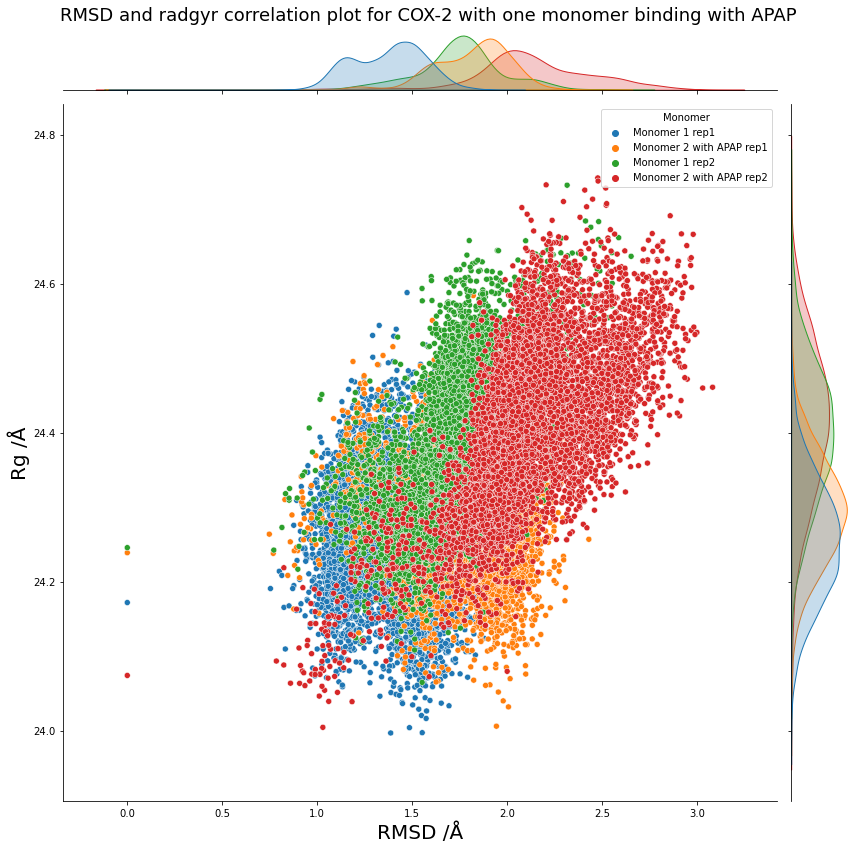

In [13]:
rmsd_APAP_m1 = pt.rmsd(APAP_COX_traj3,ref=0, mask=':2-555@C,N,O')
rmsd_APAP_m2 = pt.rmsd(APAP_COX_traj3,ref=0, mask=':556-1109@C,N,O')
rg_dimer1 = pt.radgyr(APAP_COX_traj3, mask=':2-555')
rg_dimer2 = pt.radgyr(APAP_COX_traj3, mask=':556-1109')
rmsd_APAP2_m1 = pt.rmsd(APAP_COX_traj2,ref=0, mask=':2-555@C,N,O')
rmsd_APAP2_m2 = pt.rmsd(APAP_COX_traj2,ref=0, mask=':556-1109@C,N,O')
rg_2_dimer1 = pt.radgyr(APAP_COX_traj2, mask=':2-555')
rg_2_dimer2 = pt.radgyr(APAP_COX_traj2, mask=':556-1109')
df1 = pd.DataFrame({'RMSD /Å': rmsd_APAP_m1, 'Rg /Å':rg_dimer1, 'Monomer': 'Monomer 1 rep1'}, index=[np.arange(0,6000)])
df2 = pd.DataFrame({'RMSD /Å': rmsd_APAP_m2, 'Rg /Å':rg_dimer2, 'Monomer': 'Monomer 2 with APAP rep1' }, index=[np.arange(6000,12000)])
df3 = pd.DataFrame({'RMSD /Å': rmsd_APAP2_m1, 'Rg /Å':rg_2_dimer1, 'Monomer': 'Monomer 1 rep2'}, index=[np.arange(12000,18000)])
df4 = pd.DataFrame({'RMSD /Å': rmsd_APAP2_m2, 'Rg /Å':rg_2_dimer2, 'Monomer': 'Monomer 2 with APAP rep2'}, index=[np.arange(18000,24000)])
frames = [df1, df2, df3, df4]
result = pd.concat(frames)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for COX-2 with one monomer binding with APAP",fontsize=18)

h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.savefig("APAP.png",dpi=400)

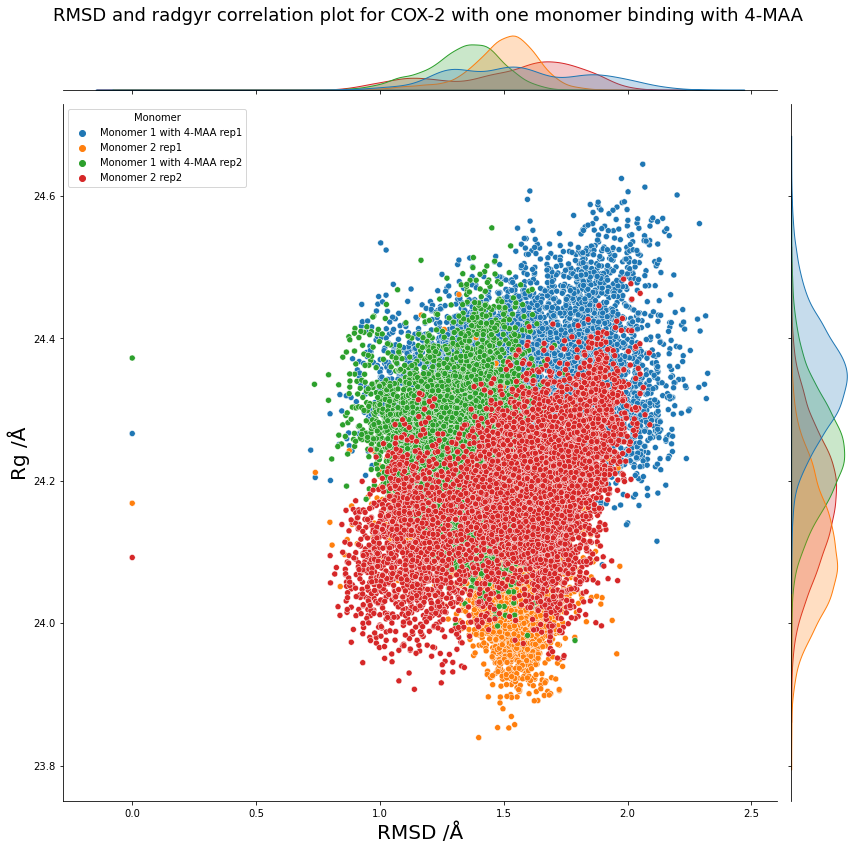

In [9]:
rmsd_MAA_m1 = pt.rmsd(MAA_COX_traj1,ref=0, mask=':2-555@C,N,O')
rmsd_MAA_m2 = pt.rmsd(MAA_COX_traj1,ref=0, mask=':556-1109@C,N,O')
rg__MAA_dimer1 = pt.radgyr(MAA_COX_traj1, mask=':2-555')
rg__MAA_dimer2 = pt.radgyr(MAA_COX_traj1, mask=':556-1109')
rmsd_MAA2_m1 = pt.rmsd(MAA_COX_traj2,ref=0, mask=':2-555@C,N,O')
rmsd_MAA2_m2 = pt.rmsd(MAA_COX_traj2,ref=0, mask=':556-1109@C,N,O')
rg_MAA2_dimer1 = pt.radgyr(MAA_COX_traj2, mask=':2-555')
rg_MAA2_dimer2 = pt.radgyr(MAA_COX_traj2, mask=':556-1109')
df5 = pd.DataFrame({'RMSD /Å': rmsd_MAA_m1, 'Rg /Å':rg__MAA_dimer1, 'Monomer': 'Monomer 1 with 4-MAA rep1'}, index=[np.arange(24000,30000)])
df6 = pd.DataFrame({'RMSD /Å': rmsd_MAA_m2, 'Rg /Å':rg__MAA_dimer2, 'Monomer': 'Monomer 2 rep1' }, index=[np.arange(30000,36000)])
df7 = pd.DataFrame({'RMSD /Å': rmsd_MAA2_m1, 'Rg /Å':rg_MAA2_dimer1, 'Monomer': 'Monomer 1 with 4-MAA rep2'}, index=[np.arange(36000,42000)])
df8 = pd.DataFrame({'RMSD /Å': rmsd_MAA2_m2, 'Rg /Å':rg_MAA2_dimer2, 'Monomer': 'Monomer 2 rep2'}, index=[np.arange(42000,48000)])
frames = [df5, df6, df7, df8]
result = pd.concat(frames)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for COX-2 with one monomer binding with 4-MAA",fontsize=18)

h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.savefig("4-MAA.png",dpi=400)

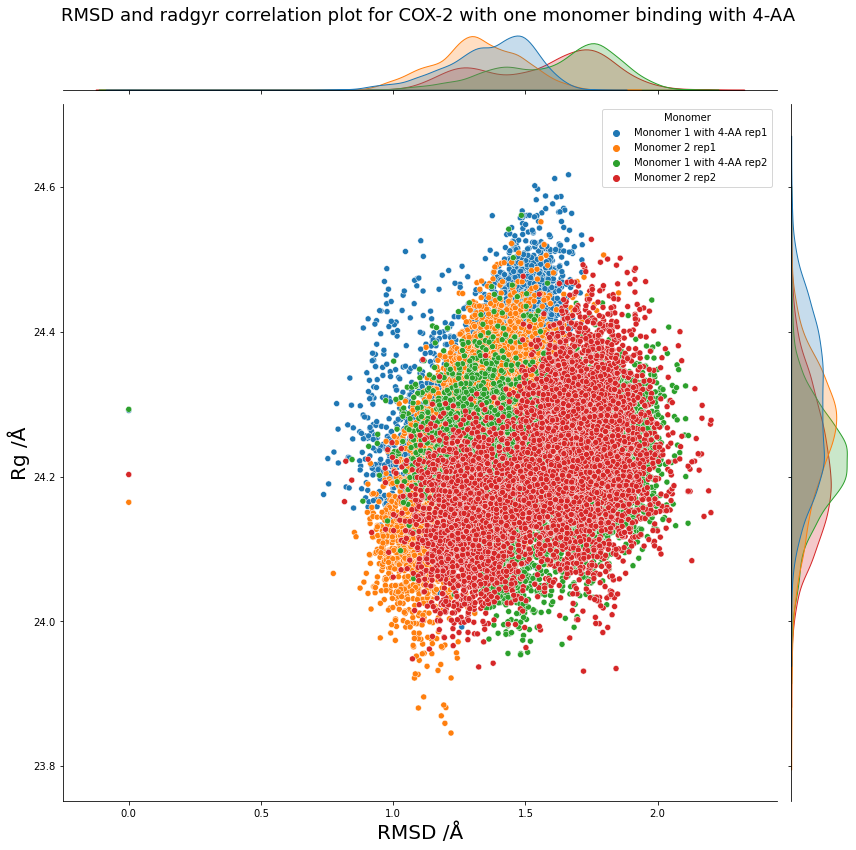

In [10]:
rmsd_AA_m1 = pt.rmsd(AA_COX_traj1,ref=0, mask=':2-555@C,N,O')
rmsd_AA_m2 = pt.rmsd(AA_COX_traj1,ref=0, mask=':556-1109@C,N,O')
rg_AA_dimer1 = pt.radgyr(AA_COX_traj1, mask=':2-555')
rg_AA_dimer2 = pt.radgyr(AA_COX_traj1, mask=':556-1109')
rmsd_AA2_m1 = pt.rmsd(AA_COX_traj2,ref=0, mask=':2-555@C,N,O')
rmsd_AA2_m2 = pt.rmsd(AA_COX_traj2,ref=0, mask=':556-1109@C,N,O')
rg_AA2_dimer1 = pt.radgyr(AA_COX_traj2, mask=':2-555')
rg_AA2_dimer2 = pt.radgyr(AA_COX_traj2, mask=':556-1109')
df9 = pd.DataFrame({'RMSD /Å': rmsd_AA_m1, 'Rg /Å':rg_AA_dimer1, 'Monomer': 'Monomer 1 with 4-AA rep1'}, index=[np.arange(48000,54000)])
df10 = pd.DataFrame({'RMSD /Å': rmsd_AA_m2, 'Rg /Å':rg_AA_dimer2, 'Monomer': 'Monomer 2 rep1' }, index=[np.arange(54000,60000)])
df11 = pd.DataFrame({'RMSD /Å': rmsd_AA2_m1, 'Rg /Å':rg_AA2_dimer1, 'Monomer': 'Monomer 1 with 4-AA rep2'}, index=[np.arange(60000,66000)])
df12 = pd.DataFrame({'RMSD /Å': rmsd_AA2_m2, 'Rg /Å':rg_AA2_dimer2, 'Monomer': 'Monomer 2 rep2'}, index=[np.arange(66000,72000)])
frames = [df9, df10, df11, df12]
result = pd.concat(frames)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for COX-2 with one monomer binding with 4-AA",fontsize=18)

h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.savefig("4-AA.png",dpi=400)

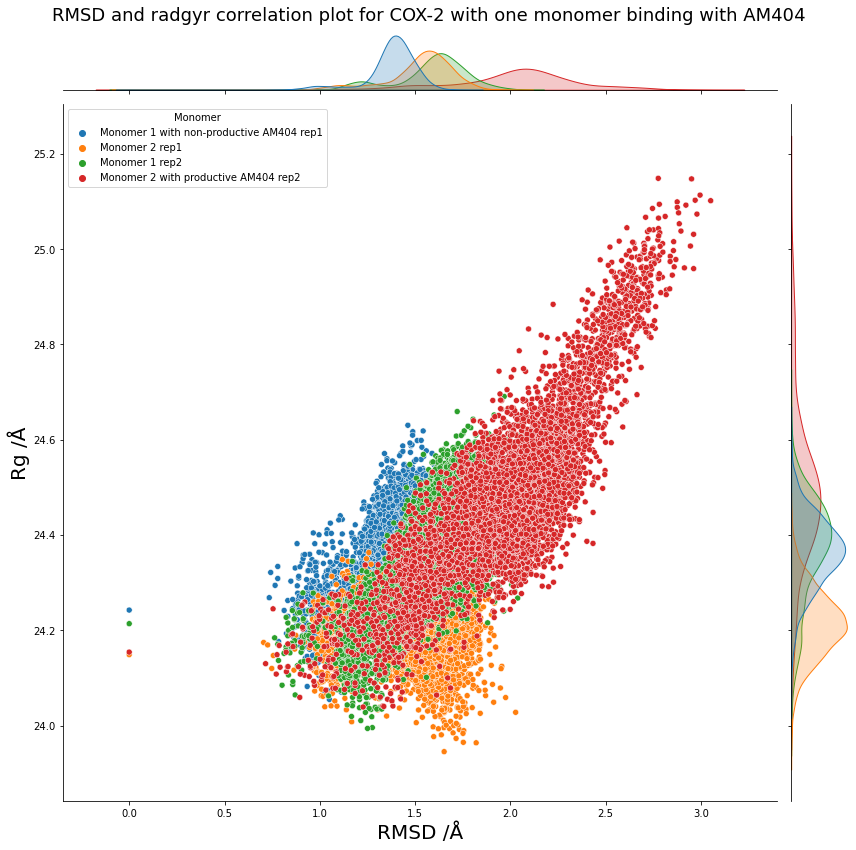

In [17]:
rmsd_AM404_m1 = pt.rmsd(AM404_COX_traj1,ref=0, mask=':2-555@C,N,O')
rmsd_AM404_m2 = pt.rmsd(AM404_COX_traj1,ref=0, mask=':556-1109@C,N,O')
rg_A4_dimer1 = pt.radgyr(AM404_COX_traj1, mask=':2-555')
rg_A4_dimer2 = pt.radgyr(AM404_COX_traj1, mask=':556-1109')
rmsd_A42_m1 = pt.rmsd(AM404_COX_traj2,ref=0, mask=':2-555@C,N,O')
rmsd_A42_m2 = pt.rmsd(AM404_COX_traj2,ref=0, mask=':556-1109@C,N,O')
rg_A42_dimer1 = pt.radgyr(AM404_COX_traj2, mask=':2-555')
rg_A42_dimer2 = pt.radgyr(AM404_COX_traj2, mask=':556-1109')
df13 = pd.DataFrame({'RMSD /Å': rmsd_AM404_m1, 'Rg /Å':rg_A4_dimer1, 'Monomer': 'Monomer 1 with non-productive AM404 rep1'}, index=[np.arange(72000,78000)])
df14 = pd.DataFrame({'RMSD /Å': rmsd_AM404_m2, 'Rg /Å':rg_A4_dimer2, 'Monomer': 'Monomer 2 rep1' }, index=[np.arange(78000,84000)])
df15 = pd.DataFrame({'RMSD /Å': rmsd_A42_m1, 'Rg /Å':rg_A42_dimer1, 'Monomer': 'Monomer 1 rep2'}, index=[np.arange(84000,90000)])
df16 = pd.DataFrame({'RMSD /Å': rmsd_A42_m2, 'Rg /Å':rg_A42_dimer2, 'Monomer': 'Monomer 2 with productive AM404 rep2'}, index=[np.arange(90000,96000)])
frames = [df13, df14, df15, df16]
result = pd.concat(frames)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for COX-2 with one monomer binding with AM404",fontsize=18)

h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.savefig("AM404.png",dpi=400)

In [27]:
pt.superpose(APAP_COX_traj2, ref=0)
pt.superpose(APAP_COX_traj3, ref=0)
pt.superpose(MAA_COX_traj1, ref=0)
pt.superpose(MAA_COX_traj2, ref=0)
pt.superpose(AA_COX_traj1, ref=0)
pt.superpose(AA_COX_traj2, ref=0)
pt.superpose(AM404_COX_traj1, ref=0)
pt.superpose(AM404_COX_traj2, ref=0)


APAP_COX_rmsf1=pt.rmsf(traj= APAP_COX_traj2[int(len(APAP_COX_traj2)*0.75):],mask='byres')   
V_M1_1=APAP_COX_rmsf1[1:554]
V_M2_1=APAP_COX_rmsf1[554:]
APAP_COX_rmsf1_stack=np.vstack((V_M1_1.T[1],V_M2_1.T[1]))
print (APAP_COX_rmsf1_stack)
APAP_COX_rmsf2=pt.rmsf(traj= APAP_COX_traj3[int(len(APAP_COX_traj3)*0.75):],mask='byres')   
V_M1_2=APAP_COX_rmsf2[1:554]
V_M2_2=APAP_COX_rmsf2[554:]
APAP_COX_rmsf2_stack=np.vstack((V_M1_2.T[1],V_M2_2.T[1]))
print (APAP_COX_rmsf2_stack)

MAA_rmsf1=pt.rmsf(traj= MAA_COX_traj1[int(len(MAA_COX_traj1)*0.75):],mask='byres')   
MAA_M1_1=MAA_rmsf1[1:554]
MAA_M2_1=MAA_rmsf1[554:]
MAA_rmsf1_stack=np.vstack((MAA_M1_1.T[1],MAA_M2_1.T[1]))
print (MAA_rmsf1_stack)
MAA_rmsf2=pt.rmsf(traj= MAA_COX_traj2[int(len(MAA_COX_traj2)*0.75):],mask='byres')   
MAA_M1_2=MAA_rmsf2[1:554]
MAA_M2_2=MAA_rmsf2[554:]
MAA_rmsf2_stack=np.vstack((MAA_M1_2.T[1],MAA_M2_2.T[1]))
print (MAA_rmsf2_stack)

AA_rmsf1=pt.rmsf(traj= AA_COX_traj1[int(len(AA_COX_traj1)*0.75):],mask='byres')   
AA_M1_1=AA_rmsf1[1:554]
AA_M2_1=AA_rmsf1[554:]
AA_rmsf1_stack=np.vstack((AA_M1_1.T[1],AA_M2_1.T[1]))
print (AA_rmsf1_stack)
AA_rmsf2=pt.rmsf(traj= AA_COX_traj2[int(len(AA_COX_traj2)*0.75):],mask='byres')     
AA_M1_2=AA_rmsf2[1:554]
AA_M2_2=AA_rmsf2[554:]
AA_rmsf2_stack=np.vstack((AA_M1_2.T[1],AA_M2_2.T[1]))
print (AA_rmsf2_stack)

AM404_rmsf1=AM404_rmsf1=pt.rmsf(traj= AM404_COX_traj1[int(len(AM404_COX_traj1)*0.75):],mask='byres')   
AM404_M1_1=AM404_rmsf1[1:554]
AM404_M2_1=AM404_rmsf1[554:]
AM404_rmsf1_stack=np.vstack((AM404_M1_1.T[1],AM404_M2_1.T[1]))
print (AM404_rmsf1_stack)
AM404_rmsf2=AM404_rmsf2=pt.rmsf(traj= AM404_COX_traj2[int(len(AM404_COX_traj2)*0.75):],mask='byres')   
AM404_M1_2=AM404_rmsf2[1:554]
AM404_M2_2=AM404_rmsf2[554:]
AM404_rmsf2_stack=np.vstack((AM404_M1_2.T[1],AM404_M2_2.T[1]))
print (AM404_rmsf2_stack)

[[1.50383323 1.68592901 1.14075581 ... 1.36582837 0.99481796 0.63431423]
 [1.89051836 1.85184901 1.44889332 ... 1.41549954 1.03512327 0.64442779]]
[[3.69797043 3.96000573 1.58648817 ... 1.3674371  0.94101921 0.57952578]
 [1.37715317 1.10675668 0.86843322 ... 1.21549058 0.97112258 0.61794453]]
[[2.31360345 2.03956259 1.21400793 ... 1.28946588 0.88697731 0.55214806]
 [1.68028329 1.38611222 0.86847777 ... 1.39920162 0.90276623 0.55361745]]
[[1.42818402 1.4162929  0.96008834 ... 1.27919166 0.95326611 0.56416153]
 [1.36584096 1.20960893 0.87836258 ... 1.20437137 0.99748844 0.5922285 ]]
[[1.35487415 1.32212394 0.87386764 ... 1.28507747 0.8798602  0.60234051]
 [1.66972415 1.57431866 0.99038539 ... 1.29591836 0.90900063 0.58821933]]
[[1.43445437 1.34892694 0.93174297 ... 1.23755299 0.90107519 0.5582642 ]
 [1.65357503 1.6123383  1.01088853 ... 1.28476645 1.19637503 0.78744809]]
[[1.41491344 1.2051862  0.98703311 ... 1.24271432 0.95360808 0.55711292]
 [2.57694717 1.97266871 1.35832446 ... 1.5032

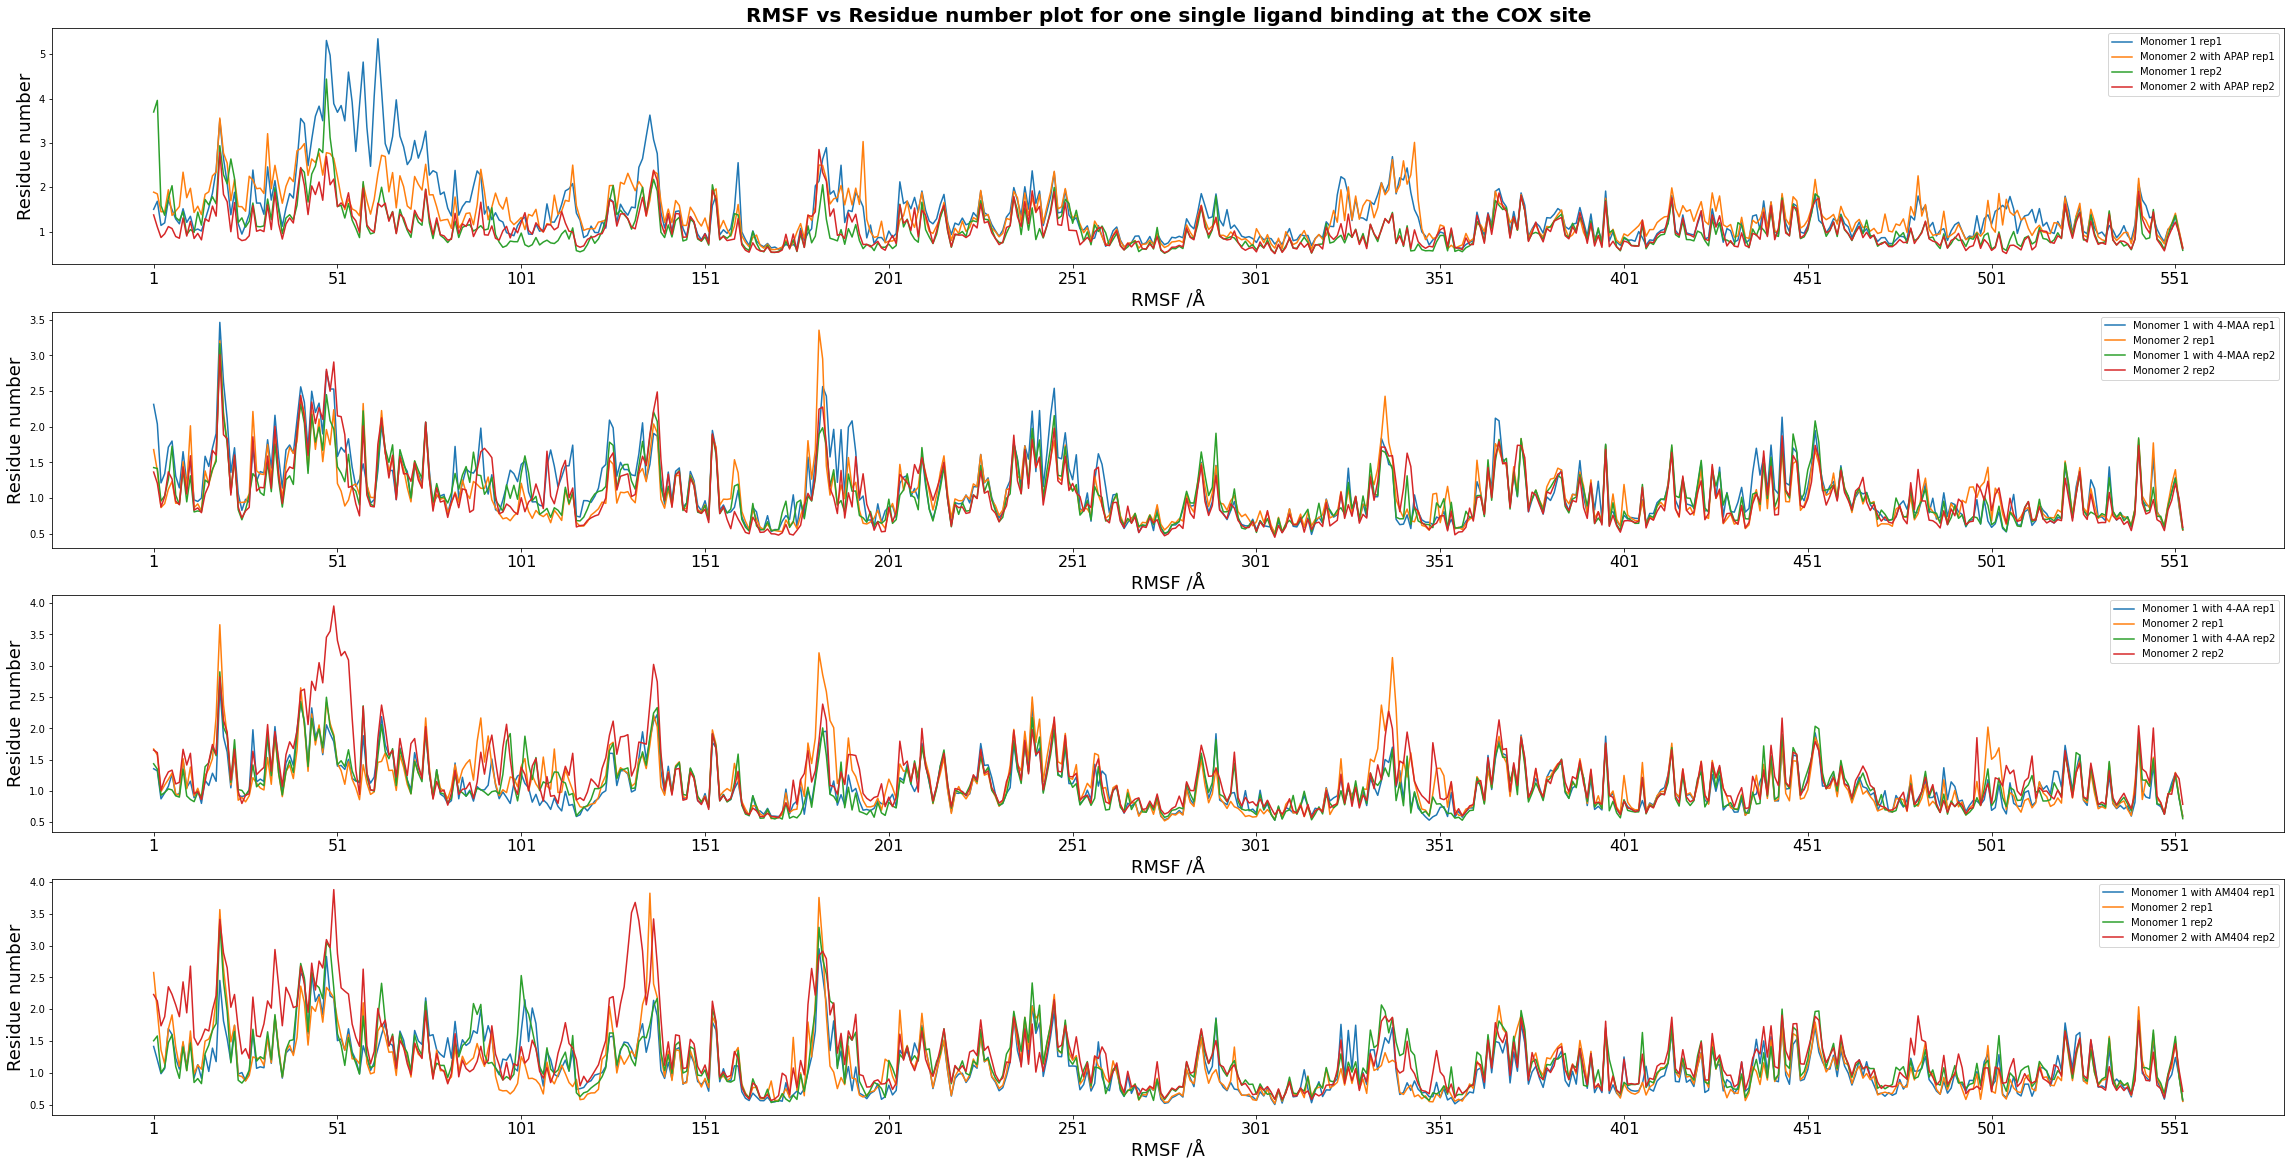

In [33]:
fig, axs = plt.subplots(4, figsize=(40,20))

res_seq=np.array(range(1,554))
axs[0].plot(res_seq,V_M1_1.T[1],label= "Monomer 1 rep1")
axs[0].plot(res_seq,V_M2_1.T[1],label= "Monomer 2 with APAP rep1")
axs[0].plot(res_seq,V_M1_2.T[1],label= "Monomer 1 rep2")
axs[0].plot(res_seq,V_M2_2.T[1],label= "Monomer 2 with APAP rep2")
axs[0].legend(loc='upper right')
axs[0].set_xticks(range(1,554,50)) 
axs[0].set_xticklabels(range(1,554,50), fontsize=16)



axs[1].plot(res_seq,MAA_M1_1.T[1],label= "Monomer 1 with 4-MAA rep1")
axs[1].plot(res_seq,MAA_M2_1.T[1],label= "Monomer 2 rep1")
axs[1].plot(res_seq,MAA_M1_2.T[1],label= "Monomer 1 with 4-MAA rep2")
axs[1].plot(res_seq,MAA_M2_2.T[1],label= "Monomer 2 rep2")
axs[1].legend(loc='upper right')
axs[1].set_xticks(range(1,554,50)) 
axs[1].set_xticklabels(range(1,554,50),fontsize=16)



axs[2].plot(res_seq,AA_M1_1.T[1],label= "Monomer 1 with 4-AA rep1")
axs[2].plot(res_seq,AA_M2_1.T[1],label= "Monomer 2 rep1")
axs[2].plot(res_seq,AA_M1_2.T[1],label= "Monomer 1 with 4-AA rep2")
axs[2].plot(res_seq,AA_M2_2.T[1],label= "Monomer 2 rep2")
axs[2].legend(loc='upper right')
axs[2].set_xticks(range(1,554,50)) 
axs[2].set_xticklabels(range(1,554,50), fontsize=16)

axs[3].plot(res_seq,AM404_M1_1.T[1],label= "Monomer 1 with AM404 rep1")
axs[3].plot(res_seq,AM404_M2_1.T[1],label= "Monomer 2 rep1")
axs[3].plot(res_seq,AM404_M1_2.T[1],label= "Monomer 1 rep2")
axs[3].plot(res_seq,AM404_M2_2.T[1],label= "Monomer 2 with AM404 rep2")
axs[3].legend(loc='upper right')
axs[3].set_xticks(range(1,554,50)) 
axs[3].set_xticklabels(range(1,554,50), fontsize=16)

axs[0].set_title('RMSF vs Residue number plot for one single ligand binding at the COX site',fontweight="bold", size=20)


axs[0].set_xlabel('RMSF /Å', fontsize=18)
axs[0].set_ylabel('Residue number',fontsize=18)
axs[1].set_xlabel('RMSF /Å',fontsize=18)
axs[1].set_ylabel('Residue number',fontsize=18)
axs[2].set_xlabel('RMSF /Å',fontsize=18)
axs[2].set_ylabel('Residue number',fontsize=18)
axs[3].set_xlabel('RMSF /Å',fontsize=18)
axs[3].set_ylabel('Residue number',fontsize=18)
#do not visualize the head and tail residues, because they rmsf value and unlikely involves the allosteric regulation
#plt.rcParams['font.size'] = '16'

#plt.xticks(range(1,554,50),fontsize=30)
#plt.yticks(fontsize=30)
#plt.xlabel('residue sequence',fontsize=34)
#plt.ylabel('RMSF /$\AA$',fontsize=34)
#plt.title('COX-2  RMSF vs Residues', fontdict = {'fontsize' : 54})
#plt.legend(loc='upper right',fontsize=30)

plt.savefig("rmsf_subplot.png",dpi=400,bbox_inches='tight')